<a href="https://colab.research.google.com/github/nhattminh160901/cv/blob/main/__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [11]:
cycol = cycle('bgrcmk')
plt.rcParams["font.family"] = "Arial"

In [ ]:
!sudo apt install msttcorefonts -qq
!rm ~/.cache/matplotlib -rf

In [ ]:
df = pd.read_csv(f"/content/khao_sat/data_serial_1.csv")
df

,v,time,rate
0,-200,21,20.0
1,-190,22,20.0
2,-180,22,20.0
3,-170,22,20.0
4,-160,22,20.0
...,...,...,...
805,-160,22,20.0
806,-170,22,20.0
807,-180,22,20.0
808,-190,22,20.0


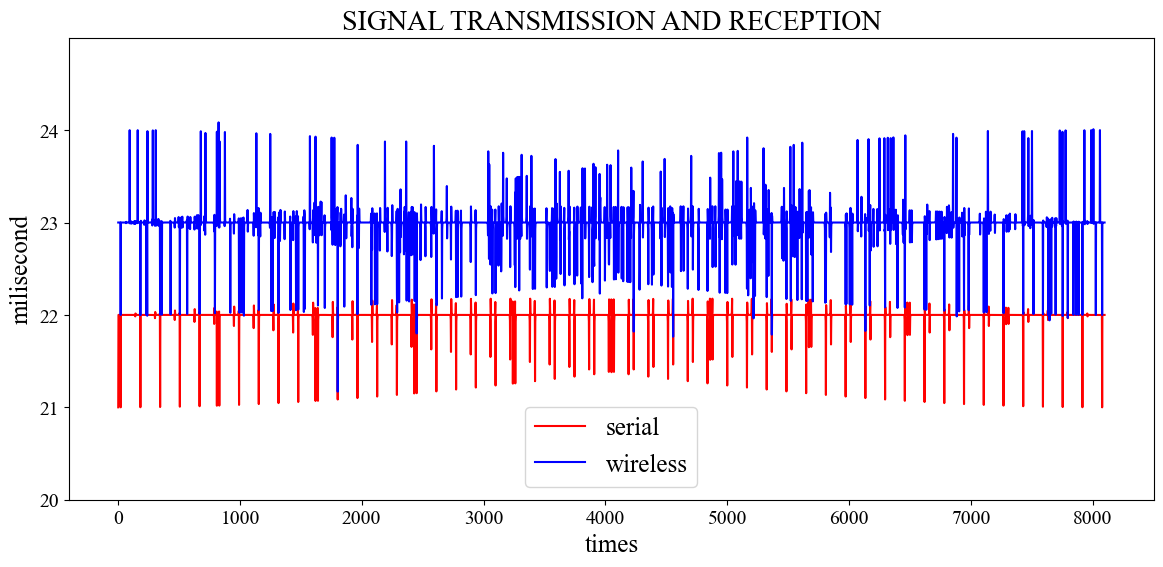

In [3]:
fig, ax = plt.subplots(figsize=(14, 6))
plt.title('SIGNAL TRANSMISSION AND RECEPTION', fontsize=20)

ax.set_ylim(20, 25)
ax.set_yticks(np.arange(20, 25, 1))
ax.set_ylabel("milisecond", fontsize=18)
ax.set_xlabel("times", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)

count = 0
x = []
t1 = []
t2 = []

for i in range(10):
  df = pd.read_csv(f"/content/khao_sat/data_serial_{i+1}.csv")
  df2 = pd.read_csv(f"/content/khao_sat/data_wireless_{i+1}.csv")
  for _ in df.index.values:
    x.append(count)
    count+=1
  t1 = t1 + df.time.values.tolist()
  t2 = t2 + df2.time.values.tolist()

x = np.array(x)
t1 = np.array(t1)
t2 = np.array(t2)
from scipy.interpolate import make_interp_spline

x_new = np.linspace(x.min(), x.max(), 4050)
spl1 = make_interp_spline(x, t1, k=5)
t1_sm = spl1(x_new)

spl2 = make_interp_spline(x, t2, k=5)
t2_sm = spl2(x_new)

# ax.plot(x, t1, color="red", linewidth=0.5)
# ax.plot(x, t2, color="blue", linewidth=0.5)

ax.plot(x_new, t1_sm, color="red", label="serial", lw=1.5)
ax.plot(x_new, t2_sm, color="blue", label="wireless", lw=1.5)

# ax.plot(x[:100], t1[:100], color="red", label="serial")
# ax.plot(x[:100], t2[:100], color="blue", label="wireless")

ax.legend(fontsize=18)
fig.show()

In [ ]:
fig.savefig('1200dpi_.png', dpi=1200)

In [7]:
df_ = pd.read_csv("/content/17_25_53.csv")
column_list = df_.columns.to_list()
listColor = ["red", "yellow", "purple", "blue", "green"]

In [ ]:
fc = 2
fs = 50

from scipy import signal
def lowpass(y, fc, fs):
    b, a = signal.butter(3, fc/(fs*0.5), "low")
    filtered_current = signal.filtfilt(b, a, y, padlen=len(y)-1)
    return filtered_current

-58.09796766606372
-59.96663720170712
-61.25741985899523
-62.27616753726208


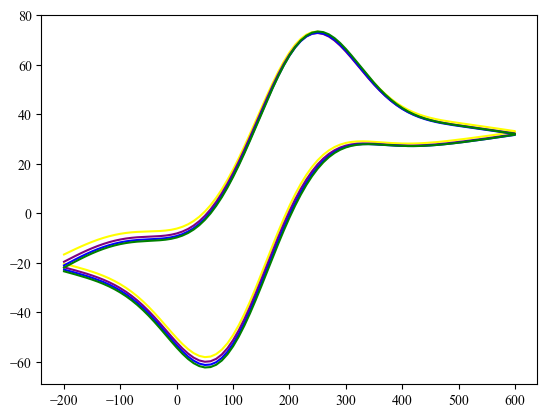

In [ ]:
for _ in range(int(len(column_list)/3)):
    if _>0:
        v = df_[column_list[(_+1)*3-3]].values
        i = df_[column_list[(_+1)*3-2]].values
        i_ = lowpass(i, fc, fs)
        print(min(i_))
        plt.plot(v, i_, color=listColor[_])

In [5]:
df__ = pd.read_csv("/content/17_27_43.csv")

In [8]:
v = df_[column_list[(0+1)*3-3]].values
i = df_[column_list[14]].values
i_= df__[column_list[14]].values

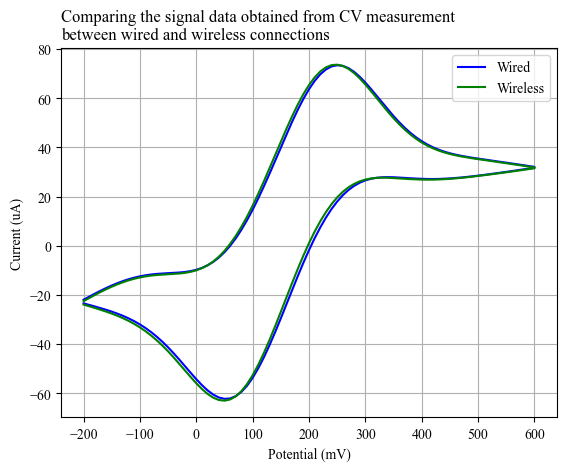

In [9]:
plt.title("Comparing the signal data obtained from CV measurement\nbetween wired and wireless connections",
          loc="left")

plt.xlabel("Potential (mV)")
plt.ylabel("Current (uA)")
plt.plot(v, i, label="Wired", color="blue")
plt.plot(v, i_, label="Wireless", color="green")

plt.grid()
plt.legend()
# plt.savefig('1200dpi_.jpg', dpi=1200)
plt.show()

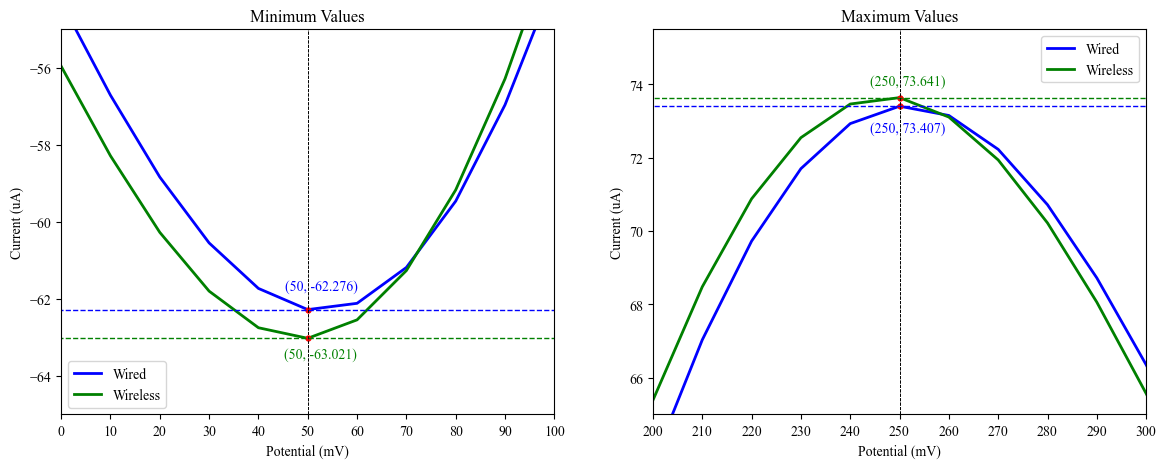

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].set_ylim([-65, -55])
ax[0].set_xlim([0, 100])
ax[0].set_xticks(np.arange(0, 110, 10))
ax[0].plot(v, i, label="Wired", color="blue", linewidth=2)
ax[0].plot(v, i_, label="Wireless", color="green", linewidth=2)

ax[1].set_ylim([65, 75.5])
ax[1].set_xlim([200, 300])
ax[1].set_xticks(np.arange(200, 310, 10))
ax[1].plot(v, i, label="Wired", color="blue", linewidth=2)
ax[1].plot(v, i_, label="Wireless", color="green", linewidth=2)

# plt.axvline(x=int(v[i.tolist().index(min(i))]), color='black', linestyle="dashed")
# plt.axvline(x=int(v[i.tolist().index(max(i))]), color='black', linestyle="dashed")
def cor_min(axis, i, posx, posy, color):
  x, y = (int(v[i.tolist().index(min(i))]), round(min(i), 3))
  axis.set_title("Minimum Values")
  axis.set_xlabel("Potential (mV)")
  axis.set_ylabel("Current (uA)")
  axis.plot(x, y, "ro", ms=3.5)
  axis.hlines(y=y, xmin=min(v), xmax=max(v), linewidth=1, ls="--", color=color)
  axis.text(x-posx, y+posy, "({}, {})".format(x, y), color=color)
  axis.axvline(x=x, color="black", linewidth=0.6, ls="--")
  axis.legend()

def cor_max(axis, i, posx, posy, color):
  x, y = (int(v[i.tolist().index(max(i))]), round(max(i), 3))
  axis.set_title("Maximum Values")
  axis.set_xlabel("Potential (mV)")
  axis.set_ylabel("Current (uA)")
  axis.plot(x, y, "ro", ms=3.5)
  axis.hlines(y=y, xmin=min(v), xmax=max(v), linewidth=1, ls="--", color=color)
  axis.text(x-posx, y+posy, "({}, {})".format(x, y), color=color)
  axis.axvline(x=x, color="black", linewidth=0.6, ls="--")
  axis.legend()

cor_min(ax[0], i, 4.7, 0.5, "blue")
cor_min(ax[0], i_, 4.8, -0.5, "green")

cor_max(ax[1], i, 6, -0.7, "blue")
cor_max(ax[1], i_, 6, 0.35, "green")

# plt.grid()

fig.show()

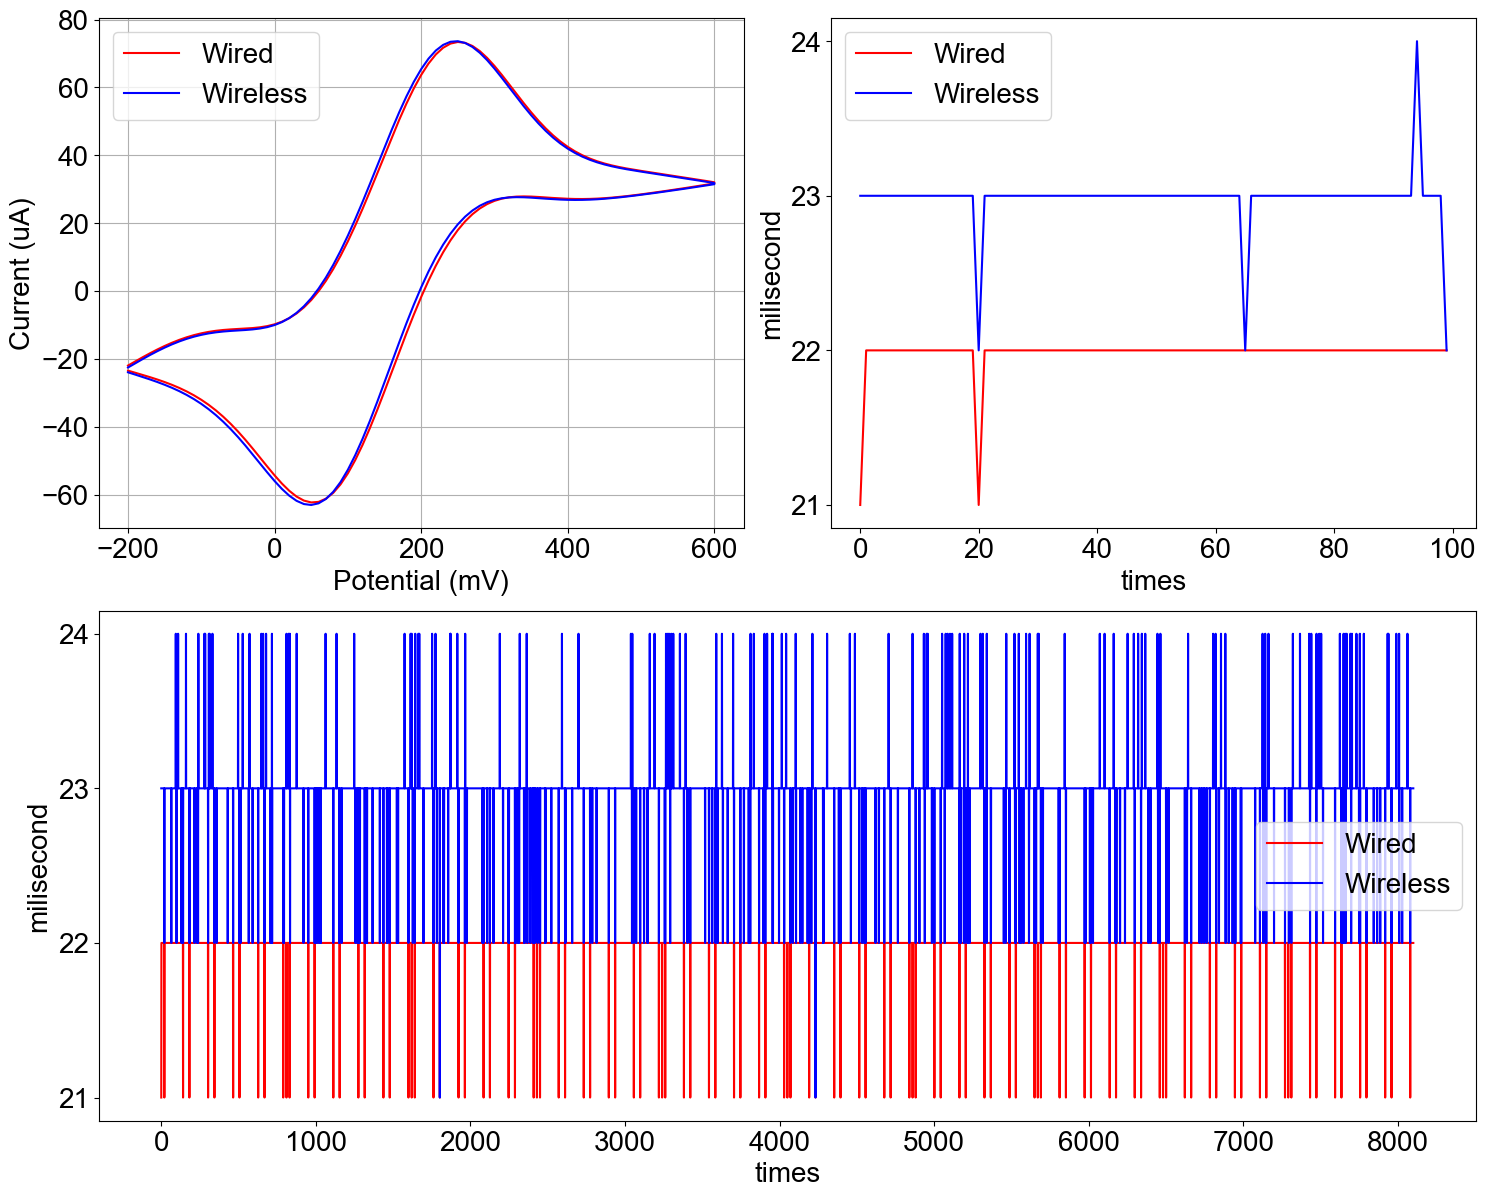

In [17]:
plt.figure(figsize = (16, 12))
# Vẽ đồ thị hàng 1, cột 1
plt.subplot(2, 2, 1)
# plt.title("(a)\n", loc="left", fontsize=20)
plt.xlabel("Potential (mV)", fontsize=20)
plt.ylabel("Current (uA)", fontsize=20)
plt.plot(v, i, label="Wired", color="red")
plt.plot(v, i_, label="Wireless", color="blue")
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid()
plt.legend(fontsize=20)


# Vẽ đồ thị hàng 1, cột 2
plt.subplot(2, 2, 2)
plt.plot(x[:100], t1[:100], color="red", label="Wired")
plt.plot(x[:100], t2[:100], color="blue", label="Wireless")
# plt.title("(b)\n", loc="left", fontsize=20)
plt.ylabel("milisecond", fontsize=20)
plt.xlabel("times", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(np.arange(min(t1[:100]), max(t2[:100])+1, 1))
plt.legend(fontsize=20)


# Vẽ đồ thị hàng 2, cột 1 (hàng 2 chỉ có 1 hình duy nhất)
plt.subplot(2, 1, 2)
plt.plot(x, t1, color="red", label="Wired")
plt.plot(x, t2, color="blue", label="Wireless")
plt.ylabel("milisecond", fontsize=20)
plt.xlabel("times", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.yticks(np.arange(min(t1), max(t2)+1, 1))
# plt.title("(c)\n", loc="left", fontsize=20)
plt.legend(fontsize=20)

plt.tight_layout()  # Sắp xếp các đồ thị sao cho không trùng lên nhau
plt.savefig("ok.jpg", dpi=1200)
plt.show()